# 1.import library and  data

In [1]:
import preprocessing as pre
import modelisation as mol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #set background of seaborn is white.
sns.set(style="whitegrid", color_codes=True)

importer les donnees du titanic et afficher les 5 premieres lignes

In [2]:
train = pd.read_csv("titanic_train.csv",sep=",")
test = pd.read_csv("titanic_test.csv", sep=",")
#df=pd.concat([train, test])

print('record data {}.'.format(train.shape))

train.isnull().sum()

record data (891, 12).


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 2.Data pre-processing

faire l'inventaire des colonnes du dataframe en precisant les colonnes quantitatives et les qualitatives

identifier les valeurs manquantes et imputer les par le mode pour les variables qualitatives et la mediane pour les varialbes quantitatives

considerer les variables ['SibSp', 'Parch', 'Fare'] et mettre en place un modèle de regression logistique

## les colonnes quantitatives :Age and fare
## les colonnes qualitatives: Survived, Pclass,SibSp,Parch, Embarked

## identifier les valeurs manquantes

In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# check missing value

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

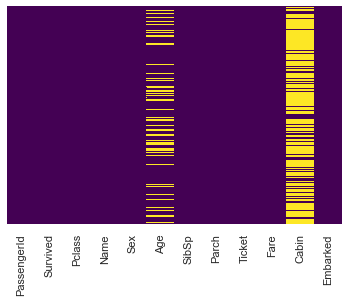

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## imputer les par le mode pour les variables qualitatives et la mediane pour les varialbes quantitatives

## 2.1 Age

In [8]:
# "age" null percent
print('"age" missing percent  %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))

"age" missing percent  19.87%


## About 20% age's data is missing

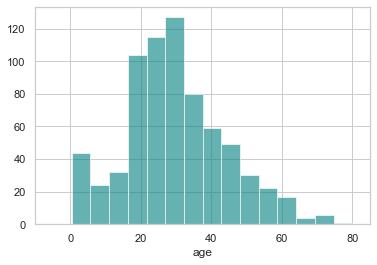

In [9]:
ax = train["Age"].hist(bins=15, color='teal', alpha=0.6)
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

## Using the mean value instead of the missing value is not the best choice, we can choose to use the middle value instead of the missing value.

## 2.2 Cabin

In [10]:
# as we can see, Cabin is null : 1014, 
print('"Cabin" null percent %.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))

"Cabin" null percent 77.10%


## About 77% of the passengers' cabin are missing, and the best option is not to use the value of this feature.

## so we decide remove this feature value

## 2.3Embarked

In [11]:
# embarker missing percent
print('"Embarked" missing percent %.2f%%' %((train['Embarked'].isnull().sum()/train.shape[0])*100))

"Embarked" missing percent 0.22%


## Only 0.23% of passengers have missing embarkation location data, and the plural can be used to replace the missing values.

group by embarked location (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


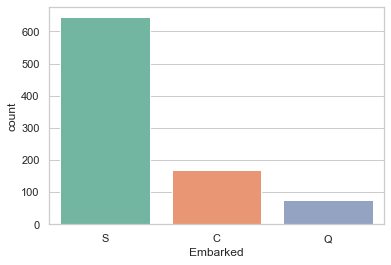

In [12]:
print('group by embarked location (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train,palette='Set2')
plt.show()

In [13]:
print('The major of passenger embarkation places is %s.' %train['Embarked'].value_counts().idxmax())

The major of passenger embarkation places is S.


## As most people board at Southhampton, "S" can be used instead of the missing data values.

## 2.4 Adjustment of data to missing data

## Based on the above analysis, we make the following adjustments:

If a data "Age" is missing, replace it with the median age of 28.

If a data "Embarked" is missing, replace it with the majoritaire "S" of the place of embarkation.

Because too many passengers' "Cabin" data is missing, discard the value of this feature from all data.

In [14]:
data = train.copy()


data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
data["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)

data.drop('Cabin', axis=1, inplace=True)

#data=pre.input_missing_values(data)


# check if there is also some missing value
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## See the distribution of ages before and after adjustment.

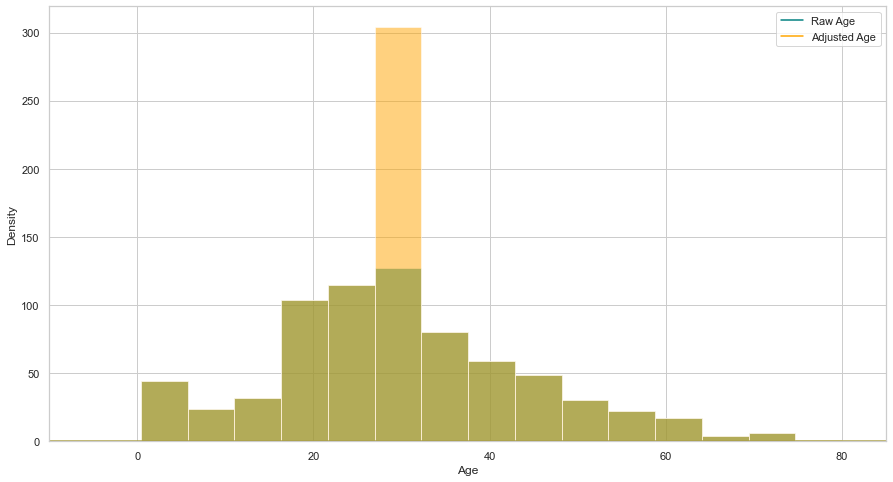

In [15]:
plt.figure(figsize=(15,8))
ax = train["Age"].hist(bins=15, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax = data["Age"].hist(bins=15,  stacked=True, color='orange', alpha=0.5)
data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

## 2.5 “Sibsp" “Parch” categorical variables

In [16]:
# groupby SibSp , different value of SibSp relation with Survived
data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
# # groupby Parch , different value of SibSp relation with Survived
data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


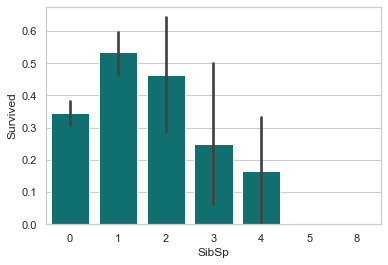

In [18]:
sns.barplot('SibSp','Survived', data=data, color="teal")
plt.show()

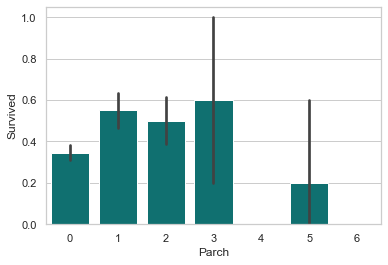

In [19]:
sns.barplot('Parch','Survived', data=data, color="teal")
plt.show()

## Use One-Hot Encoding for categorical variables, converting string categories to values.

In [20]:
# For "Embarked","Sex" One-Hot Encoding, 
final =pd.get_dummies(data, columns=["Embarked","Sex"])
final.drop('Name', axis=1, inplace=True)
final.drop('Ticket', axis=1, inplace=True)
final.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


## 2.6 quelle est la proportion des survivants, des decedés

 ## creer la target qui est represente par la colonne survived combien de personnes ont survecu combien de femmes ont embarqué et combien ont survecu? survived = train[train.Survived == 1] dead = train[train.Survived == 0]

In [21]:
survived = train[train.Survived == 1]
survived_femme = survived[survived.Sex =="female"]


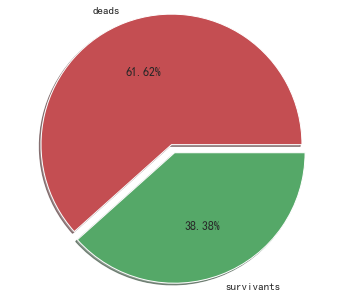

In [22]:
sns.set()
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 


cad_draw1 = train['Survived'].value_counts()
plt.axis('equal')
plt.pie(cad_draw1,
       explode = [0.1,0],
       labels = ['deads','survivants'],
       colors=['r', 'g'],
       autopct='%.2f%%',
       pctdistance=0.6,
       labeldistance = 1.1,
       shadow = True,
       startangle=0,
       radius=1.5,
       frame=False)
n = 1
plt.savefig('proportionOf_survivied_%d.png' % n, dpi=200)

# 3. Data analysis


## 3.1. Age

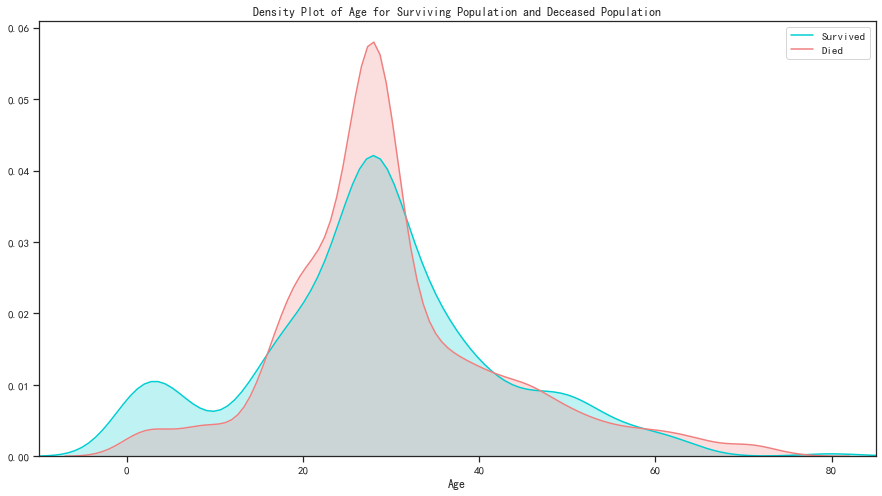

In [23]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final["Age"][final.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final["Age"][final.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

### The distribution of survivors and casualties is similar, with the only major difference being the use of younger passengers in the survivor group. This means that people at the time reserved their children's chances of survival.

## 3.2 Fare

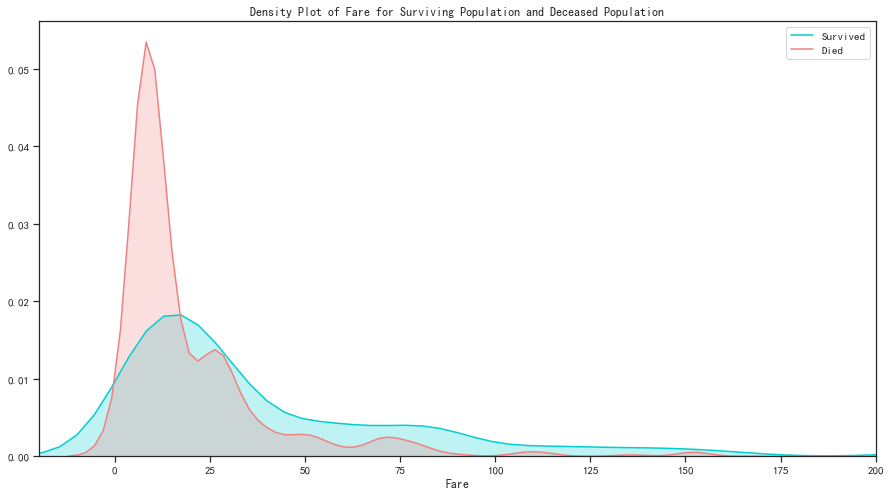

In [24]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final["Fare"][final.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final["Fare"][final.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

### The difference in fare distribution between survivors and victims is large, suggesting that this feature is important in predicting whether passengers will survive or not. Ticket price is correlated with position, and it may be that position affects the effectiveness of the escape.

## 3.3 Pclass

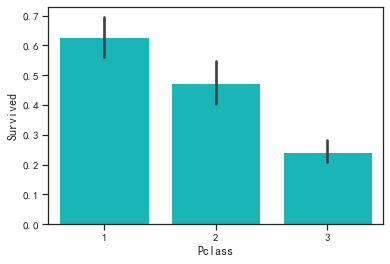

In [25]:
sns.barplot('Pclass', 'Survived', data=train, color="darkturquoise")
plt.show()

### First-class passengers have the best chance of survival.

### 3.4 Embarked

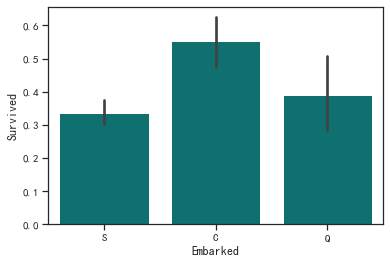

In [26]:
sns.barplot('Embarked', 'Survived', data=train, color="teal")
plt.show()

### Passengers logged in from Cherbourge, France have the highest chance of survival.

### “Sibsp" “Parch”

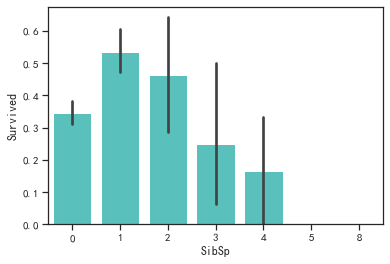

In [27]:
sns.barplot('SibSp', 'Survived', data=final, color="mediumturquoise")
plt.show()

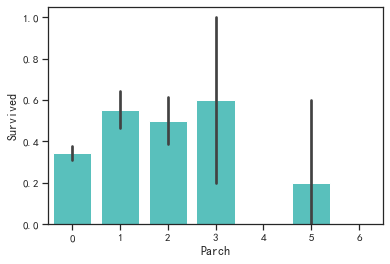

In [28]:
sns.barplot('Parch', 'Survived', data=final, color="mediumturquoise")
plt.show()

### Survival rates were lower for those who traveled alone. In those days, the majority of solo passengers were men.

## 3.6 Sex

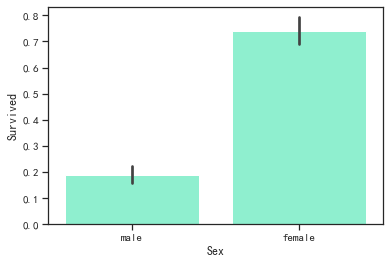

In [29]:
sns.barplot('Sex', 'Survived', data=train, color="aquamarine")
plt.show()

In [30]:
final.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


### Apparently, the survival rate is higher for women.

# 4. using logistic regression to make predictions

### Separation of data sets into training and test data sets for testing model effects

### First we take the variables ['SibSp', 'Parch', 'Fare'] to finish a regression logistic model.

In [31]:


model_cols1 =['SibSp', 'Parch', 'Fare']
X, y = pre.parse_model(X=final.copy(), use_columns=model_cols1)

Train/Test split results:
Accuracy 0.631
              precision    recall  f1-score   support

           0       0.61      0.96      0.74       100
           1       0.81      0.22      0.34        79

    accuracy                           0.63       179
   macro avg       0.71      0.59      0.54       179
weighted avg       0.70      0.63      0.57       179



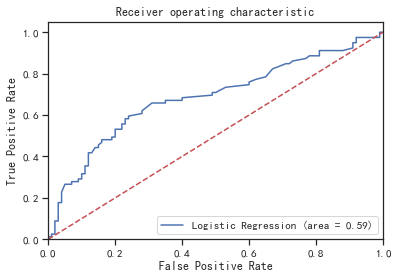

In [32]:


log1=mol.logmodel_prediction(X, y)

### Here , we take more variables into to finish model

In [33]:
model_cols2 =["Age","Fare","Pclass","Embarked_C","Embarked_S","Sex_male",'SibSp', 'Parch']
X2, y2 = pre.parse_model(X=final.copy(), use_columns=model_cols2)

Train/Test split results:
Accuracy 0.788
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.85      0.63      0.72        79

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.78       179



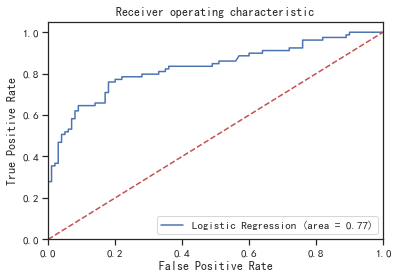

In [34]:
# ROC curve
#The larger the area under the curve, the better the classification.
log2=mol.logmodel_prediction(X2, y2)

## as we can see, Accuracy = 0.78.  there is a more higher accuracy with more variables.

### Prediction (classification) works well, with pre-processing of data being especially important (feature engineering). 

## Then we predict for titanic.test.csv with better  model.

## do the same data pre-processing for titanic_test.csv data

In [36]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
test.isnull().sum()
test["Age"].fillna(test["Age"].median(skipna=True), inplace=True)
test["Embarked"].fillna(test['Embarked'].value_counts().idxmax(), inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# check if there is also some missing value
test.isnull().sum()
final_test =pd.get_dummies(test, columns=["Embarked","Sex"])
final_test.drop('Name', axis=1, inplace=True)
final_test.drop('Ticket', axis=1, inplace=True)
final_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,0,1,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,1,0
2,894,2,62.0,0,0,9.6875,0,1,0,0,1
3,895,3,27.0,0,0,8.6625,0,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1,1,0


In [38]:
final_test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_female     0
Sex_male       0
dtype: int64

In [39]:
final_test[final_test.isnull().values==True]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
152,1044,3,60.5,0,0,NaN,0,0,1,0,1


In [40]:
final_test["Fare"].fillna(final_test['Fare'].value_counts().idxmax(), inplace=True)
#data["fare"].fillna(df["fare"].median(skipna=True), inplace=True)


final_test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_female     0
Sex_male       0
dtype: int64

In [43]:
model_cols1 =["Age","Fare","Pclass","Embarked_C","Embarked_S","Sex_male",'SibSp', 'Parch']
Xtest=final_test[model_cols1]
ytest_pred=log2(Xtest)


## the result :

In [44]:
ytest_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# 5. Faire la meme chose avec un modele ensembliste

## Random forest model

### training random forest model

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)


random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)





rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79166667 0.70833333 0.6056338  0.74647887 0.67605634 0.61971831
 0.66197183 0.61971831 0.66197183 0.69014085]
Mean: 0.678169014084507
Standard Deviation: 0.055879023162203154


### Our random forest model has a average accuracy of 68% with a standard deviation of 5.8%. 

## Feature Importance

In [51]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head()

,importance
feature,
Fare,0.812
SibSp,0.099
Parch,0.090


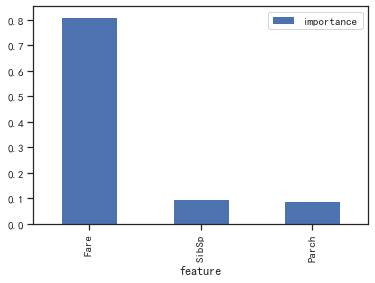

In [52]:
importances.plot.bar()

## make a prediction for "titanic_test.csv" 

In [55]:
col=['SibSp', 'Parch', 'Fare']
Xtest2=final_test[col]
Y_prediction = random_forest.predict(Xtest2)

In [56]:
Y_prediction

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

##### Note: For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

### Etude des variables

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
%pylab inline


def plot_hist(feature, bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1, x2], label=["Victime", "Survivant"], bins=bins, color=['r', 'b'])
    plt.legend(loc="upper left")
    plt.title('distribution relative de %s' %feature)
    plt.show()


In [ ]:
from sklearn import preprocessing

def dummify_features(df):
    """
    Transform categorical variables to dummy variables.

    Parameters
    ----------
    df: dataframe containing only categorical features

    Returns
    -------
    X: new dataframe with dummified features
       Each column name becomes the previous one + the modality of the feature

    enc: the OneHotEncoder that produced X (it's used later in the processing chain)
    """
    colnames = df.columns
    le_dict = {}
    for col in colnames:
        le_dict[col] = preprocessing.LabelEncoder()
        le_dict[col].fit(df[col])
        df.loc[:, col] = le_dict[col].transform(df[col])

    enc = preprocessing.OneHotEncoder()
    enc.fit(df)
    X = enc.transform(df)

    dummy_colnames = [cv + '_' + str(modality) for cv in colnames for modality in le_dict[cv].classes_]
    # for cv in colnames:
    #     for modality in le_dict[cv].classes_:
    #         dummy_colnames.append(cv + '_' + modality)

    return X, dummy_colnames, enc
to_dummify = ["Pclass"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(train[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

In [ ]:
- Faire la meme chose avec un modele ensembliste

